## Background to problem
Coastal zones are heavily populated and developed regions, which are confronted with threats of erosion. Shoreline change rate is a widely used variable to descripte the magnitude of coastal erosion (negative value) or accretion (positive value). Finding the most at-risk coastal zones requires some geospatial analysis.

In this problem, you will be given two geodataframes: 1. coastal compartments (as polygons) in QLD; 2. Shoreline change rates (m/yr) for every 2 km segments (as linestrings). 

Your task is to visualize the average shoreline change rate for each coastal compartment and identify the most at risk one. The task includes the following three steps:
1. Spatial join two datasets to find the  corresponding compartment for each coastal segment (2 km linestring)
2. Based on the joined geodataframe, calculate the “mean shoreline change rate” for each compartment.
3. Add the “mean shoreline change rate” column back to the coastal compartment dataframe and display it in the map with different colours.



#### Install geopandas:

In [39]:
!pip install geopandas
!pip install descartes

#### Read geodataframes

In [40]:
import geopandas
Compartments = geopandas.read_file('zip:///arcgis/home/CoastalCompartments.zip') # geodataframe for coastal compartments
SCR = geopandas.read_file('zip:////arcgis/home/ShorelineChangeRate.zip') # geodataframe for shoreline change rates

#### Visualize raw data

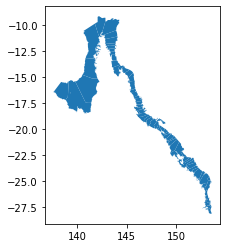

In [41]:
Compartments.plot()

In [42]:
Compartments.head()

,name,to_,from_,geometry
0,Hinchinbrook Island,Lucinda,Cape Richardson,"POLYGON ((146.79075 -17.97681, 146.79137 -17.9..."
1,Double Point-Hull Heads,Tam-O Shanter Point,Double Point,"POLYGON ((146.59237 -17.64269, 146.59387 -17.6..."
2,Bell-Peak-Cooper Point,Cooper Point,Bell Peak,"POLYGON ((146.47077 -16.97929, 146.47137 -16.9..."
3,Cairns Coast,Cape Grafton,Port Douglas,"POLYGON ((146.03512 -16.43619, 146.03445 -16.4..."
4,Southern Gulf of Carpentaria,Bayley Point,Calvert River,"POLYGON ((138.73508 -17.20588, 138.73490 -17.2..."


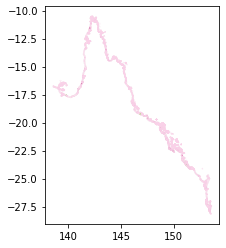

In [43]:
SCR.plot('SCR', cmap = 'PiYG')

In [44]:
SCR.head()

,Length,SCR,geometry
0,1999.001064,-0.074238,"LINESTRING (153.41678 -27.93995, 153.41640 -27..."
1,1562.099769,0.073798,"LINESTRING (153.41673 -27.93184, 153.41680 -27..."
2,1999.000424,0.101488,"LINESTRING (153.42008 -27.91350, 153.42009 -27..."
3,1998.001627,0.587806,"LINESTRING (153.42144 -27.89557, 153.42138 -27..."
4,1998.001467,0.954162,"LINESTRING (153.42015 -27.88116, 153.42022 -27..."


## Your Task

### Step 1:
You should spatial join the first two geodataframes. As a result, the output geodataframe have the compartment name for every coastal segment (LineString)

In [45]:
# Your answer goes here
Compartments_sjoin = geopandas.sjoin(SCR, Compartments, how='inner', op='within') # using "inner" join operation so that only the SCR within compartment considered
Compartments_sjoin.head()

,Length,SCR,geometry,index_right,name,to_,from_
0,1999.001064,-0.074238,"LINESTRING (153.41678 -27.93995, 153.41640 -27...",11,Stradbroke-Gold Coast,Point Danger,Point Lookout
1,1562.099769,0.073798,"LINESTRING (153.41673 -27.93184, 153.41680 -27...",11,Stradbroke-Gold Coast,Point Danger,Point Lookout
2,1999.000424,0.101488,"LINESTRING (153.42008 -27.91350, 153.42009 -27...",11,Stradbroke-Gold Coast,Point Danger,Point Lookout
3,1998.001627,0.587806,"LINESTRING (153.42144 -27.89557, 153.42138 -27...",11,Stradbroke-Gold Coast,Point Danger,Point Lookout
4,1998.001467,0.954162,"LINESTRING (153.42015 -27.88116, 153.42022 -27...",11,Stradbroke-Gold Coast,Point Danger,Point Lookout


### Step 2:
You should calculate the mean shoreline change rate for each Compartment name

In [46]:
# Your answer goes here
mean_Compartments = Compartments_sjoin.groupby('name').mean()[["SCR"]]
mean_Compartments.columns = ["Mean_SCR"]
mean_Compartments.head()

,Mean_SCR
name,
Abbott Bay,0.323201
Bathurst Head-Cape Melville,0.020533
Bell-Peak-Cooper Point,0.086574
Bowling Green Bay,0.038982
Bribie Island,-0.140602


### Step 3:
Add the “mean shoreline change rate” column back to the coastal compartment dataframe and display it in the map with different colours.\


In [47]:
# Your answer goes here
# Making the Compartment name as index for merging with the mean SCR of each compartment
Compartments.set_index('name', inplace=True)

# Merging the mean SCR to Compartment dataset
Compartments_merge = Compartments.merge(mean_Compartments, left_index=True, right_index=True)
Compartments_merge.head()

,to_,from_,geometry,Mean_SCR
name,,,,
Hinchinbrook Island,Lucinda,Cape Richardson,"POLYGON ((146.79075 -17.97681, 146.79137 -17.9...",-0.075399
Double Point-Hull Heads,Tam-O Shanter Point,Double Point,"POLYGON ((146.59237 -17.64269, 146.59387 -17.6...",-0.001338
Bell-Peak-Cooper Point,Cooper Point,Bell Peak,"POLYGON ((146.47077 -16.97929, 146.47137 -16.9...",0.086574
Cairns Coast,Cape Grafton,Port Douglas,"POLYGON ((146.03512 -16.43619, 146.03445 -16.4...",0.037284
Southern Gulf of Carpentaria,Bayley Point,Calvert River,"POLYGON ((138.73508 -17.20588, 138.73490 -17.2...",0.051491


Text(0.5, 1, 'The Shoreline Change Rate Variation of Queensland')

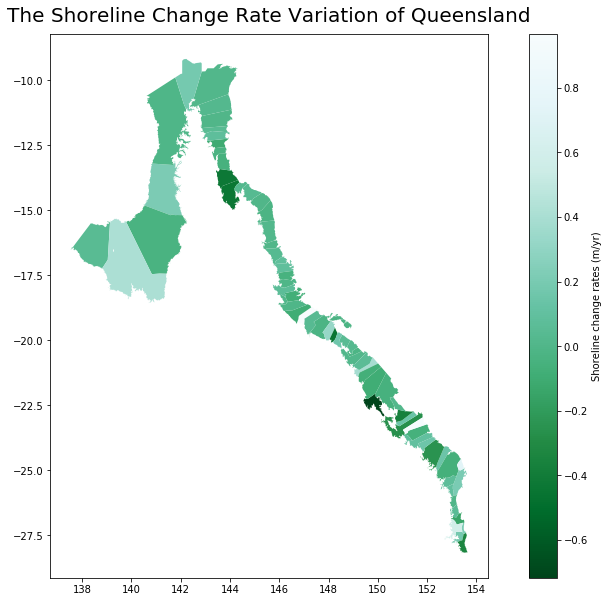

In [48]:
# Mapping the result
ax = Compartments_merge.plot(column='Mean_SCR', cmap='BuGn_r', figsize=(15,10), legend=True,
                 legend_kwds = {'label': "Shoreline change rates (m/yr)"})
ax.set_title('The Shoreline Change Rate Variation of Queensland', fontdict={'fontsize':20}, pad = 12.5)

### Discuss results

##### Describe results
In 2-3 sentences describe the results for coastal compartment most at risk

#### Discuss issues of spatial averaging 

The shoreline compartments provide a spatial unit for summarisng environmental change. Briefly discuss in 3-4 sentences assumptions and issues related to using spatial units for summarising environmental characteristics. 

In [49]:
# Finding the coastal compartment most at risk by sorting the value (finding the most negative SCR value)
Compartments_merge.sort_values(by='Mean_SCR', ascending=True)

,to_,from_,geometry,Mean_SCR
name,,,,
Broad Sound (S+E),North Point (Long Island),Red Bluff Point,"POLYGON ((149.59302 -22.58208, 149.59306 -22.5...",-0.717320
Don River Delta,Cape Edgecumbe,Abbott Point,"POLYGON ((148.35753 -19.72188, 148.32900 -19.8...",-0.454094
Princess Charlotte Bay,Bathurst Head,Stewart River,"POLYGON ((144.24000 -14.37333, 144.24000 -14.3...",-0.436318
Cape Sidmouth-Stewart River,Stewart River,Cape Sidmouth,"POLYGON ((143.59818 -13.42269, 144.04266 -13.4...",-0.423268
Capricorn Coast (north),Yeppoon,Cape Manifold,"POLYGON ((150.84539 -22.67822, 151.12387 -22.7...",-0.374914
...,...,...,...,...
Wellesley,Karumba,Bayley Point,"POLYGON ((141.43182 -17.50101, 141.43167 -17.5...",0.408116
Moreton Bay (N),Brisbane River-South Passage,Northern Entrance,"POLYGON ((152.94305 -27.28695, 152.94361 -27.2...",0.579268
Fraser Island (NE),Indian Head,Sandy Cape,"POLYGON ((153.39337 -24.56669, 153.39387 -24.5...",0.726848


### Result
The compartment with has most at risk towards the shoreline change phenomena is represented by negative value, which indicates the presence of erosion within the coastal area. The result shows that there is one compartment which has the most negative value of shoreline change rate (SCR), namely the **Broad Sound (S+E)**. This compartment has the SCR value more than **0.71 m/yr**, and making this compartment has the highest erosion level across all the compartments. 


### Issue with Spatial Averaging
Since the compartment unit area is broad, the use of compartment area as a spatial unit is sensitive to the **ecological fallacy**, or inferences about the nature of individuals are deduced from attributes of the group to which those individuals belong (Salkeld & Antolin, 2020). This issue can be understood as the **incorrectly assuming uniform data distribution of shoreline change rate for each the compartment**. The compartment spatial unit will assume that the shoreline change rate within each unit /area is homogenous, whereas the shoreline change rate varies significantly for every 2 km. Therefore, this spatial unit can **increase the bias, variance, and random error** of the data (Seshadri, 2017), since the correct shoreline change rate within each compartment may not homogenous.

References:

1. Salkeld, D.J., & Antolin, M.F. (2020). Ecological Fallacy and Aggregated Data: A Case Study of Fried Chicken Restaurants, Obesity and Lyme Disease. Ecohealth, 17
2. Seshadri, A.K. (2017). Statistics of spatial average and optimal averaging in the presence of missing data. Spatial statistic, 25